[toc]

## Python os模块 文件信息

In [3]:
import os

#### os.walk

返回一个 三元数组的 generator

假设有/tmp下面有如下目录结构 

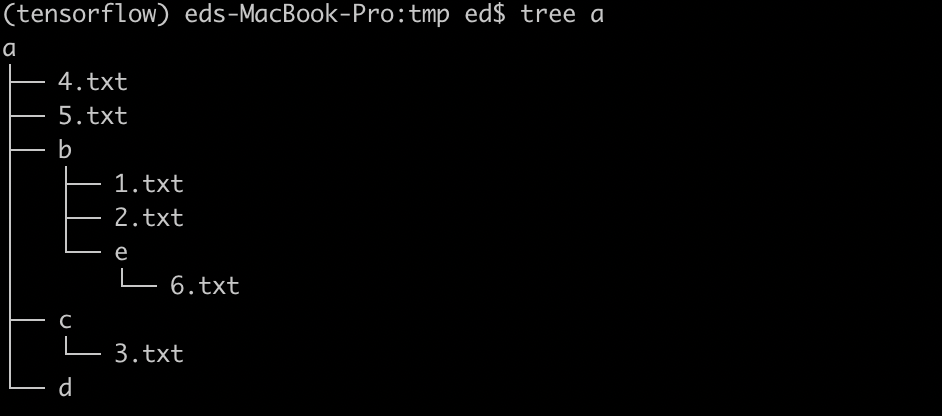

```
import os
for root, dirs, files in os.walk("/tmp/a"):
    print(root, dirs, files)
```

返回

```
/tmp/a ['c', 'd', 'b'] ['5.txt', '4.txt']
/tmp/a/c [] ['3.txt']
/tmp/a/d [] []
/tmp/a/b ['e'] ['2.txt', '1.txt']
/tmp/a/b/e [] ['6.txt']
```

实际上，我们只需要使用 root 和 files 就可以得到所有文件的路径。可以看示例

#### 获得文件类型

```
os.path.isdir('x.txt')
os.path.islink('x.txt')
os.path.isfile('x.txt')
```

#### 获得文件访问时间

In [4]:
!touch a.txt

返回的是一个 timestamp

In [7]:
print(os.path.getatime('a.txt'))
print(os.path.getctime('a.txt'))
print(os.path.getmtime('a.txt'))

1618455834.617573
1618455834.6175985
1618455834.617573


#### 获得文件大小

```
os.path.getsize('x.txt')
```

- 这个只可以获取文件大小。要获取文件夹大小要递归，将所有文件大小加起来，好鸡肋。
- 可以用 subprocess 结合 `du -sh` 命令

#### 其它

- os.mknod("test.txt"): 创建空文件
- os.stat(file): 获取文件属性, 内容基本上包含了ls可以得到的信息
- os.chmod(file): 修改文件权限与时间戳

### 实例

###### 1. 查看文件大小

```
import subprocess

filepath = '/Users/ed/Downloads'
cmd = 'du -sh {}'.format(filepath)
completed_process = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE)
completed_process.stdout.decode().strip().split('\t')[0]
```

###### 2. 按照修改时间对文件排序

```
import os
root = '/home/ed/Desktop/images'
files = os.listdir(root)
files = sorted(files, 
        key=lambda x: os.path.getmtime(os.path.join(root, x))
        )
```

```
os.path.expanduser('~') # '/home/ed'
os.path.abspath('~') # '/home/ed/Desktop/~' 这个不是我们想要的
```

- os.path.isfile(): 检验给出的路径是否是一个文件
- os.path.isdir(): 检验给出的路径是否是一个目录
- os.path.isabs(): 判断是否是绝对路径

```
os.path.isabs('~') # False
os.path.isabs(os.path.expanduser('~')) # True
```

- os.path.exists(): 判断路径是否存在

###### 3. 如何递归返回path下的所有文件的绝对路径

```
import os

def get_all_files(path):
    files = []
    for dirpath, dirname, filenames in os.walk(path):
        for filename in filenames:
            files.append(os.path.join(dirpath, filename))

    return files
```

# References
http://localhost:8888/lab/tree/learnPython/Python%20os.ipynb